# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 15__

__Nombres de los estudiantes: Juan Pablo Corella Martín y Álvaro Álvarez Iglesias__

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

file = 'countries_of_the_world.csv'

csv = pd.read_csv(file, sep=',')
df = pd.DataFrame(csv).set_index('Country')

df = df.drop(['Region'], axis=1)
df = df.dropna("index","any")

In [11]:
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393


El dataframe contiene 227 países (nº de filas), siendo 179 si eliminamos los que tienen valores vacios, y 18 variables (nº de columnas).

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [21]:
df = pd.DataFrame(csv).set_index('Country')
df = df[["GDP ($ per capita)","Literacy (%)","Phones (per 1000)","Agriculture","Industry","Service"]].dropna("index","any")
df

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
Country,,,,,,
Afghanistan,700.0,36.0,3.2,0.380,0.240,0.380
Albania,4500.0,86.5,71.2,0.232,0.188,0.579
Algeria,6000.0,70.0,78.1,0.101,0.600,0.298
Angola,1900.0,42.0,7.8,0.096,0.658,0.246
Anguilla,8600.0,95.0,460.0,0.040,0.180,0.780
...,...,...,...,...,...,...
Venezuela,4800.0,93.4,140.1,0.040,0.419,0.541
Vietnam,2500.0,90.3,187.7,0.209,0.410,0.381
Yemen,800.0,50.2,37.2,0.135,0.472,0.393


In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GDP ($ per capita),196.0,9391.836735,10108.571366,500.000,1875.00000,5250.0000,13300.00000,55100.000
Literacy (%),196.0,82.285714,19.829721,17.600,70.30000,91.1500,97.92500,100.000
Phones (per 1000),196.0,213.407143,208.316500,0.200,29.95000,141.5000,337.40000,898.000
Agriculture,196.0,0.154219,0.149170,0.000,0.03800,0.1005,0.22775,0.769
Industry,196.0,0.288597,0.139607,0.032,0.19950,0.2745,0.35050,0.906
Service,196.0,0.556679,0.164649,0.062,0.42575,0.5615,0.67150,0.954


In [ ]:
!pip install seaborn

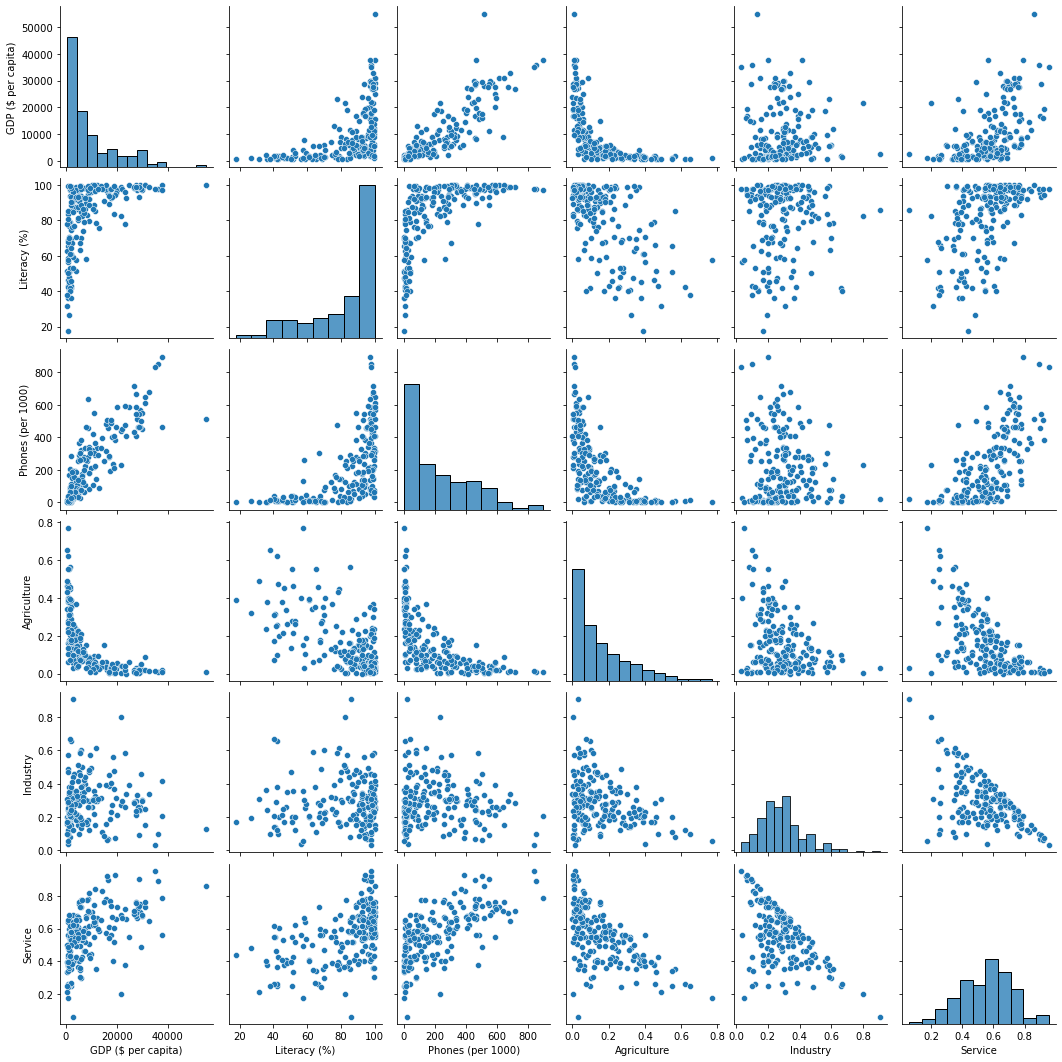

In [15]:
import seaborn as sns

sns.pairplot(df)

Podemos observar que la distribución de la mayoría de las variables es desigual: tienen picos en un extremo u en otro, indicando que hay una gran cantidad de países pobres pero también muchos con una alta alfabetización. La industria y el sector servicios, por otro lado, parecen más estables, teniendo sus máximos por el centro y sin mucha diferencia con el resto del porcentaje.

In [19]:
df.corr()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
GDP ($ per capita),1.000000,0.512422,0.859845,-0.607990,0.003426,0.548692
Literacy (%),0.512422,1.000000,0.606059,-0.615412,0.065220,0.499638
Phones (per 1000),0.859845,0.606059,1.000000,-0.639759,-0.099627,0.665395
Agriculture,-0.607990,-0.615412,-0.639759,1.000000,-0.347812,-0.609954
Industry,0.003426,0.065220,-0.099627,-0.347812,1.000000,-0.529808
Service,0.548692,0.499638,0.665395,-0.609954,-0.529808,1.000000


Al hacer la correlación de las distintas variables, podemos observar que hay algunas fuertemente ligadas entre sí: hay más teléfonos en países ricos, pero a su vez menos agricultura. La industria, por ejemplo, parece solo afectar negativamente a los otros dos sectores, pero a ninguna variable más. Algunas otras relaciones, como la alfabetización con el alto número de dispositivos de telefono, viene en parte dada por su relación con el nivel de riqueza del país, estándo ligadas entre ellas pero de forma más indirecta y menos causal.

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [34]:
from sklearn.preprocessing import MinMaxScaler

data_scaled = MinMaxScaler().fit_transform(df)
df_scaled = pd.DataFrame(data=data_scaled,    # values
                   index=df.index,    # 1st column as index
                   columns=df.columns)
data_scaled

array([[0.003663  , 0.22330097, 0.0033415 , 0.49414824, 0.23798627,
        0.35650224],
       [0.07326007, 0.83616505, 0.0790822 , 0.30169051, 0.1784897 ,
        0.57959641],
       [0.1007326 , 0.63592233, 0.08676765, 0.1313394 , 0.64988558,
        0.26457399],
       ...,
       [0.00549451, 0.39563107, 0.04121185, 0.17555267, 0.50343249,
        0.37107623],
       [0.00549451, 0.76456311, 0.00891067, 0.28608583, 0.29519451,
        0.47869955],
       [0.02564103, 0.88713592, 0.02962798, 0.23276983, 0.24141876,
        0.57959641]])

Como las variables no tienen una distribución original normal, al estandarizar estaríamos perdiendo esa información, por lo que en este caso tiene más sentido normalizar y preservar así la "escala" entre la mismas.

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [35]:
RANDOM_STATE=333

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

K_MAX = 11
score = np.zeros(K_MAX-2)
davies_boulding = np.zeros(K_MAX-2)
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE)
    km.fit(df_scaled)
    
    score[k-2] = -1 * km.score(df_scaled)
    davies_boulding[k-2] = davies_bouldin_score(df_scaled, km.labels_)
    silhouette[k-2] = silhouette_score(df_scaled, km.labels_)

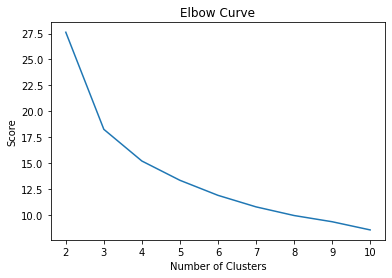

In [37]:
# diagrama del codo
plt.plot(range(2, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

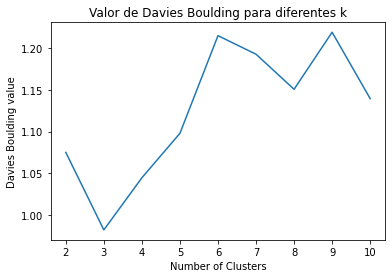

In [38]:
# davies boulding
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()

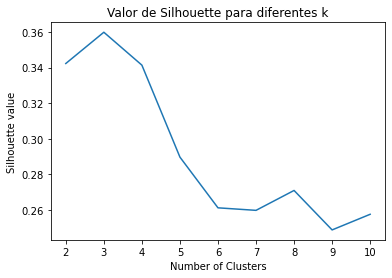

In [39]:
# silhouette
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()

En un principio, por lo mostrado por la gráfica de codo, se podría llegar a pensar que 4 clusters es una cantidad aceptable. Sin embargo, las dos gráficas siguientes nos indican claramente que 3 es el número optimo a elegir, teniendo su pico más bajo en el Daves Boulding y el más alto en el Silhouette.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [40]:
km = KMeans(init='random', n_clusters=3, random_state=RANDOM_STATE)
km.fit(df_scaled)

df = df.assign(cluster=pd.Series(data=km.labels_, index=df.index))
df.sort_values(by="cluster").loc[:, ['cluster']]

,cluster
Country,
Kuwait,0
Panama,0
Oman,0
Nicaragua,0
Namibia,0
...,...
Senegal,2
Morocco,2
Sierra Leone,2


In [42]:
df[df["cluster"] == 0]

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
Country,,,,,,,
Albania,4500.0,86.5,71.2,0.232,0.188,0.579,0
Algeria,6000.0,70.0,78.1,0.101,0.600,0.298,0
Argentina,11200.0,97.1,220.4,0.095,0.358,0.547,0
Armenia,3500.0,98.6,195.7,0.239,0.343,0.418,0
Azerbaijan,3400.0,97.0,137.1,0.141,0.457,0.402,0
...,...,...,...,...,...,...,...
Uzbekistan,1700.0,99.3,62.9,0.342,0.229,0.430,0
Venezuela,4800.0,93.4,140.1,0.040,0.419,0.541,0
Vietnam,2500.0,90.3,187.7,0.209,0.410,0.381,0


In [41]:
df[df["cluster"] == 1]

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
Country,,,,,,,
Anguilla,8600.0,95.0,460.0,0.040,0.180,0.780,1
Antigua & Barbuda,11000.0,89.0,549.9,0.038,0.220,0.743,1
Aruba,28000.0,97.0,516.1,0.004,0.333,0.663,1
Australia,29000.0,100.0,565.5,0.038,0.262,0.700,1
Austria,30000.0,98.0,452.2,0.018,0.304,0.678,1
"Bahamas, The",16700.0,95.6,460.6,0.030,0.070,0.900,1
Barbados,15700.0,97.4,481.9,0.060,0.160,0.780,1
Belgium,29100.0,98.0,462.6,0.010,0.240,0.749,1
Bermuda,36000.0,98.0,851.4,0.010,0.100,0.890,1


In [43]:
df[df["cluster"] == 2]

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
Country,,,,,,,
Afghanistan,700.0,36.0,3.2,0.380,0.240,0.380,2
Angola,1900.0,42.0,7.8,0.096,0.658,0.246,2
Bangladesh,1900.0,43.1,7.3,0.199,0.198,0.603,2
Benin,1100.0,40.9,9.7,0.316,0.138,0.546,2
Bhutan,1300.0,42.2,14.3,0.258,0.379,0.363,2
Burkina Faso,1100.0,26.6,7.0,0.322,0.196,0.482,2
Burma,1800.0,85.3,10.1,0.564,0.082,0.353,2
Burundi,600.0,51.6,3.4,0.463,0.203,0.334,2
Cambodia,1900.0,69.4,2.6,0.350,0.300,0.350,2


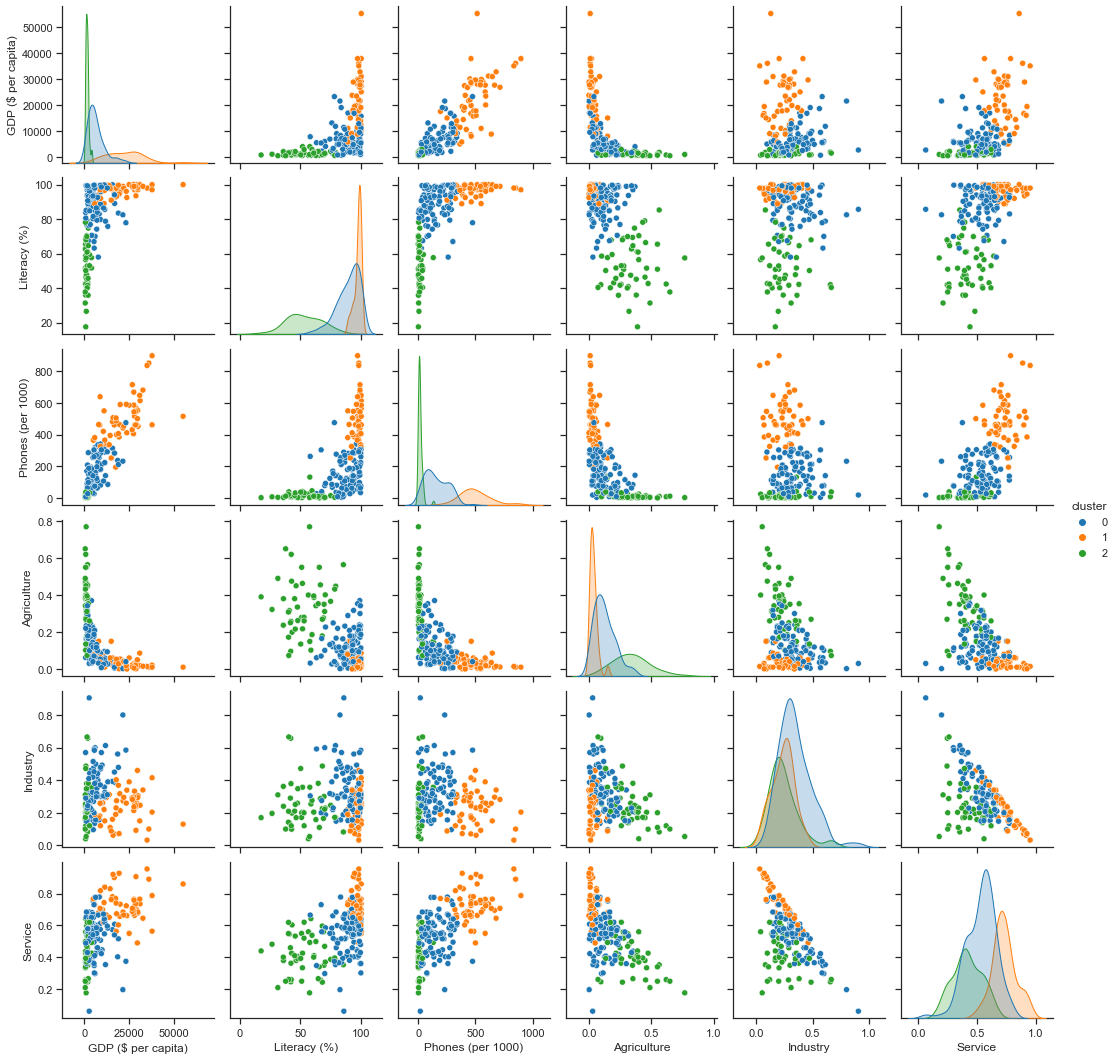

In [44]:
import seaborn as sns

sns.set_theme(style="ticks")
sns.pairplot(df, hue = "cluster", palette="tab10")

Gracias a las gráficas de distribución y separación por clusters, podemos dividir los países en tres grupos: el grupo verde son países más pobres, en azul están en vía de desarrollo y en naranja los del primer mundo.

Se puede observar que variables como el número de teléfonos y de producto interior bruto divide de forma bastánte clara al grupo verde y están muy relacionadas entre sí (ambas gráficas son muy similares). Asímismo, la agricultura y alfabetización separan al grupo naranja del resto. La industria y los servicios, por otro lado, no aclaran muy bien esa diferencia entre países, aunque se podría decir que es más predominante en los azules, sobre todo en los servicios.

Como conclusión tenemos que hay una gran desigualdad entre todos los países según sus capacidades económicas, lo que afecta de forma contundente al resto de variables.